# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from collections import Counter

In [2]:
trainData = pd.read_csv('Data/train.csv')
testData = pd.read_csv('Data/test.csv')
print(trainData.info())

print("\nShapes of both trainData and testData")
print(trainData.shape)
print(testData.shape)
print('\n')
trainData.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [3]:
def read_df(file):
    df = pd.read_csv(file)
    df = df.drop(columns=['Unnamed: 0', 'id'], errors='ignore')
    return df


trainData = read_df('Data/train.csv')
testData = read_df('Data/test.csv')
trainData.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
print(trainData.isnull().sum())
print(testData.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
Gender                                0
Cust

## Handling null values

> Let's assign Arrival Delay in Minutes for both trainData and testData to the mean value of all other known inputs for the column

In [5]:
trainArrivalMean = round(trainData["Arrival Delay in Minutes"].mean())
testArrivalMean = round(testData["Arrival Delay in Minutes"].mean())
trainData["Arrival Delay in Minutes"].fillna(trainArrivalMean, inplace = True)
testData["Arrival Delay in Minutes"].fillna(testArrivalMean, inplace = True)

# Check to see if null values are still present
print(trainData.isnull().sum())
print('\n')
print(testData.isnull().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


Gender                               0
Customer Type                        0
Age       

## Conversion of variable types

We convert categorical variables into ordinal discrete variables so our models/EDA techniques can interact and extract meaningful information from the data if the variables are of any importance at all.

In [6]:
categoryDictTrain = {}
categoryDictTest = {}
for i, col in enumerate(trainData):
    if(trainData[col].dtype == 'object'):
        values = trainData[col].unique()
        trainData[[col]] = trainData[[col]].apply(lambda x: pd.Categorical(x).codes)
        catValues = trainData[col].unique()
        currDict = dict(zip(values, catValues))
        categoryDictTrain.update(currDict)
for i, col in enumerate(testData):
    if(testData[col].dtype == 'object'):
        values = testData[col].unique()
        testData[[col]] = testData[[col]].apply(lambda x: pd.Categorical(x).codes)
        catValues = testData[col].unique()
        currDict = dict(zip(values, catValues))
        categoryDictTest.update(currDict)
print(trainData.info())
print(testData.info())
# categoryDict will hold the names of all categorical values along with their referenced number so it will be
# easier to explain the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int8   
 1   Customer Type                      103904 non-null  int8   
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int8   
 4   Class                              103904 non-null  int8   
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Memory usage reduction

> We can also reduce the memory usage furthermore by changing the int64 datatype variable to use less bytes if numbers of that size don't exist. Let's change int64 to int32 and see how much memory we can save

### For Training Data

In [7]:
before = round(trainData.memory_usage(deep = True).sum()/1000000, 2)
print("Before data transform " + str(before))

for i, col in enumerate(trainData.columns):
    maxNum = trainData[col].max()
    if trainData[col].dtype == 'int64':
        if maxNum < 127:
            trainData[col] = trainData[col].astype('int8')
        elif maxNum > 127 and maxNum < 32767:
            trainData[col] = trainData[col].astype('int32')

after = round(trainData.memory_usage(deep = True).sum()/1000000, 2)
print("After data transform "  + str(after))
print("The above transform has decreased memory usage by " + str(round(100-((after*100)/before), 2)) + "%")


Before data transform 15.48
After data transform 3.74
The above transform has decreased memory usage by 75.84%


### For Testing Data

In [8]:
before = round(testData.memory_usage(deep = True).sum()/1000000, 2)
print("Before data transform " + str(before))

for i, col in enumerate(testData.columns):
    maxNum = testData[col].max()
    if testData[col].dtype == 'int64':
        if maxNum < 127:
            testData[col] = testData[col].astype('int8')
        elif maxNum > 127 and maxNum < 32767:
            testData[col] = testData[col].astype('int32')

after = round(testData.memory_usage(deep = True).sum()/1000000, 2)
print("After data transform "  + str(after))
print("The above transform has decreased memory usage by " + str(round(100-((after*100)/before), 2)) + "%")


Before data transform 3.87
After data transform 0.94
The above transform has decreased memory usage by 75.71%


## Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
trainDataX = trainData.drop('satisfaction', axis = 1)
testDataX = testData.drop('satisfaction', axis = 1)
trainDataY = trainData['satisfaction']
testDataY = testData['satisfaction']
cols = trainDataX.columns

ss.fit(trainDataX) # fit to train mean / std deviation 

trainDataX = ss.transform(trainDataX)
trainDataX = pd.DataFrame(trainDataX, columns=cols)

testDataX = ss.transform(testDataX) # fit according to train distribution
testDataX = pd.DataFrame(testDataX, columns=cols)


In [10]:
trainDataX.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,0.415124,0.310373,0.297067,0.233935,0.545937,0.612059,0.551380,0.595377,...,0.687879,0.671632,0.676473,0.670211,0.657958,0.660858,0.728086,0.657270,0.009306,0.009582
std,0.499947,0.386404,0.193782,0.462649,0.310399,0.201363,0.265566,0.305015,0.279786,0.255524,...,0.263818,0.266598,0.257671,0.263121,0.295226,0.253079,0.235133,0.262455,0.024014,0.024395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.256410,0.000000,0.000000,0.077342,0.400000,0.400000,0.400000,0.400000,...,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000
50%,0.000000,0.000000,0.423077,0.000000,0.500000,0.163974,0.600000,0.600000,0.600000,0.600000,...,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000
75%,1.000000,0.000000,0.564103,1.000000,0.500000,0.345719,0.800000,0.800000,0.800000,0.800000,...,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

In [11]:
trainData.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178145,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640910,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


## Correlation Matrix

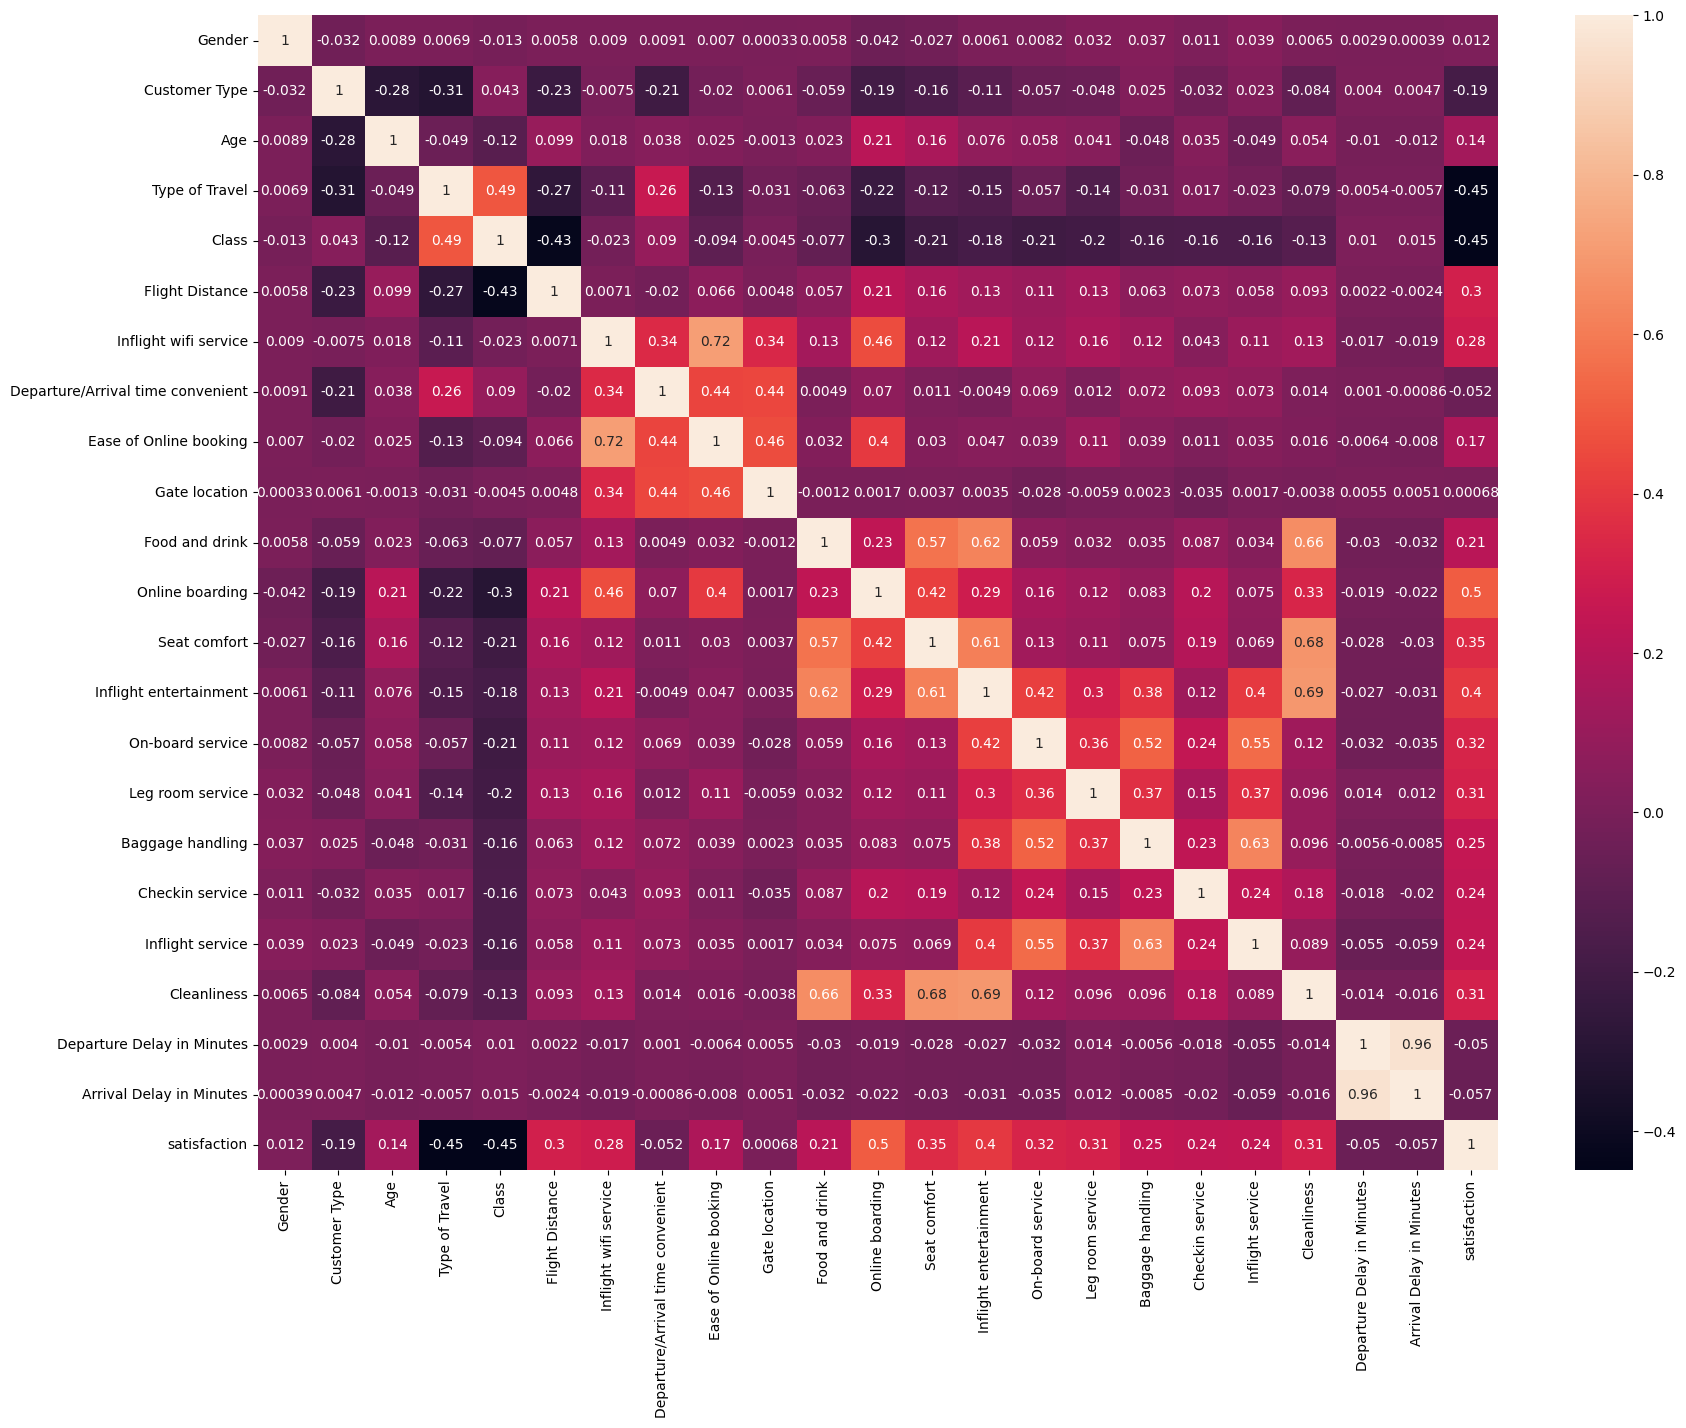

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(trainData.corr(), annot=True)
plt.show()

## Distribution

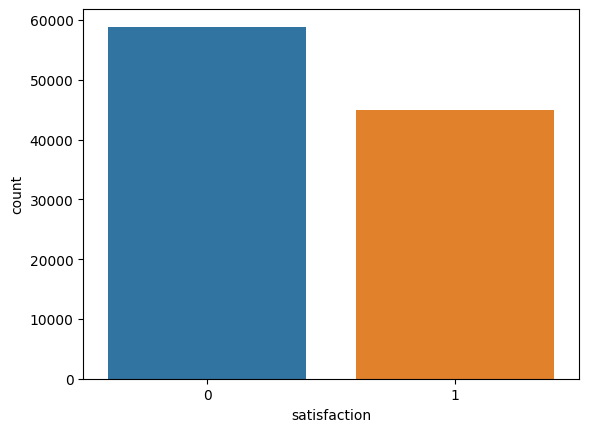

In [13]:
sns.countplot(x=trainData.satisfaction)
plt.show()

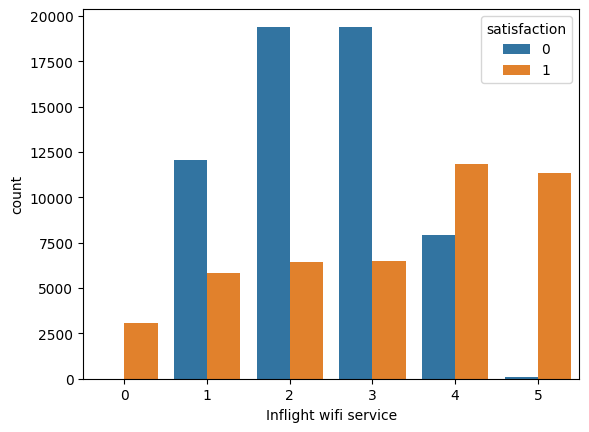

In [14]:
sns.countplot(data=trainData, x="Inflight wifi service", hue="satisfaction")
plt.show()

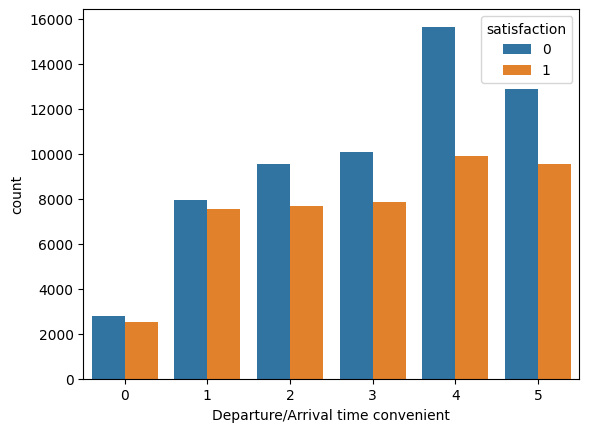

In [15]:
sns.countplot(data=trainData, x="Departure/Arrival time convenient", hue="satisfaction")
plt.show()

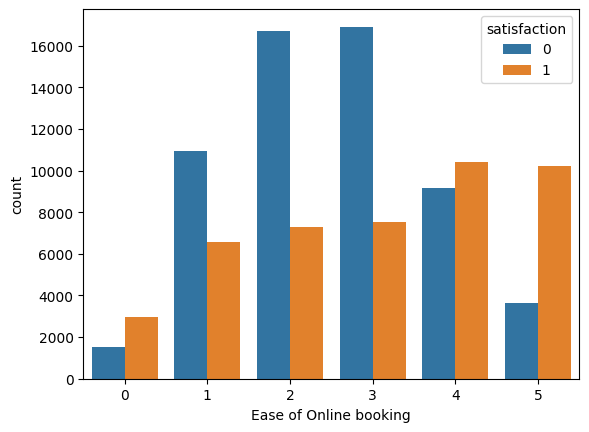

In [16]:
sns.countplot(data=trainData, x="Ease of Online booking", hue="satisfaction")
plt.show()

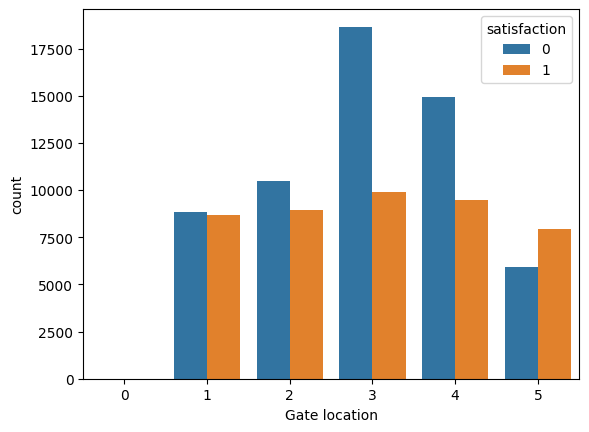

In [17]:
sns.countplot(data=trainData, x="Gate location", hue="satisfaction")
plt.show()

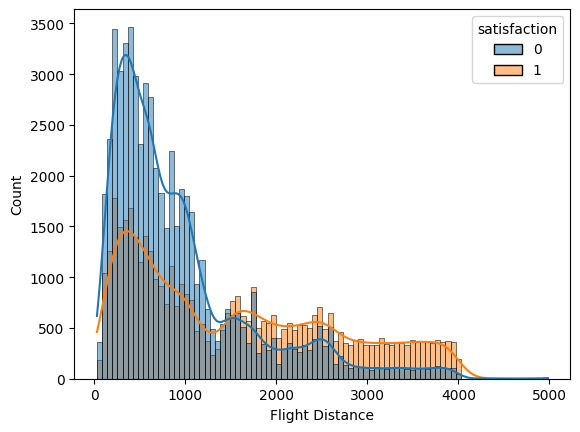

In [18]:
sns.histplot(data=trainData, x="Flight Distance", hue="satisfaction", kde=True)
plt.show()

## Entropy-loss/Gini-gain

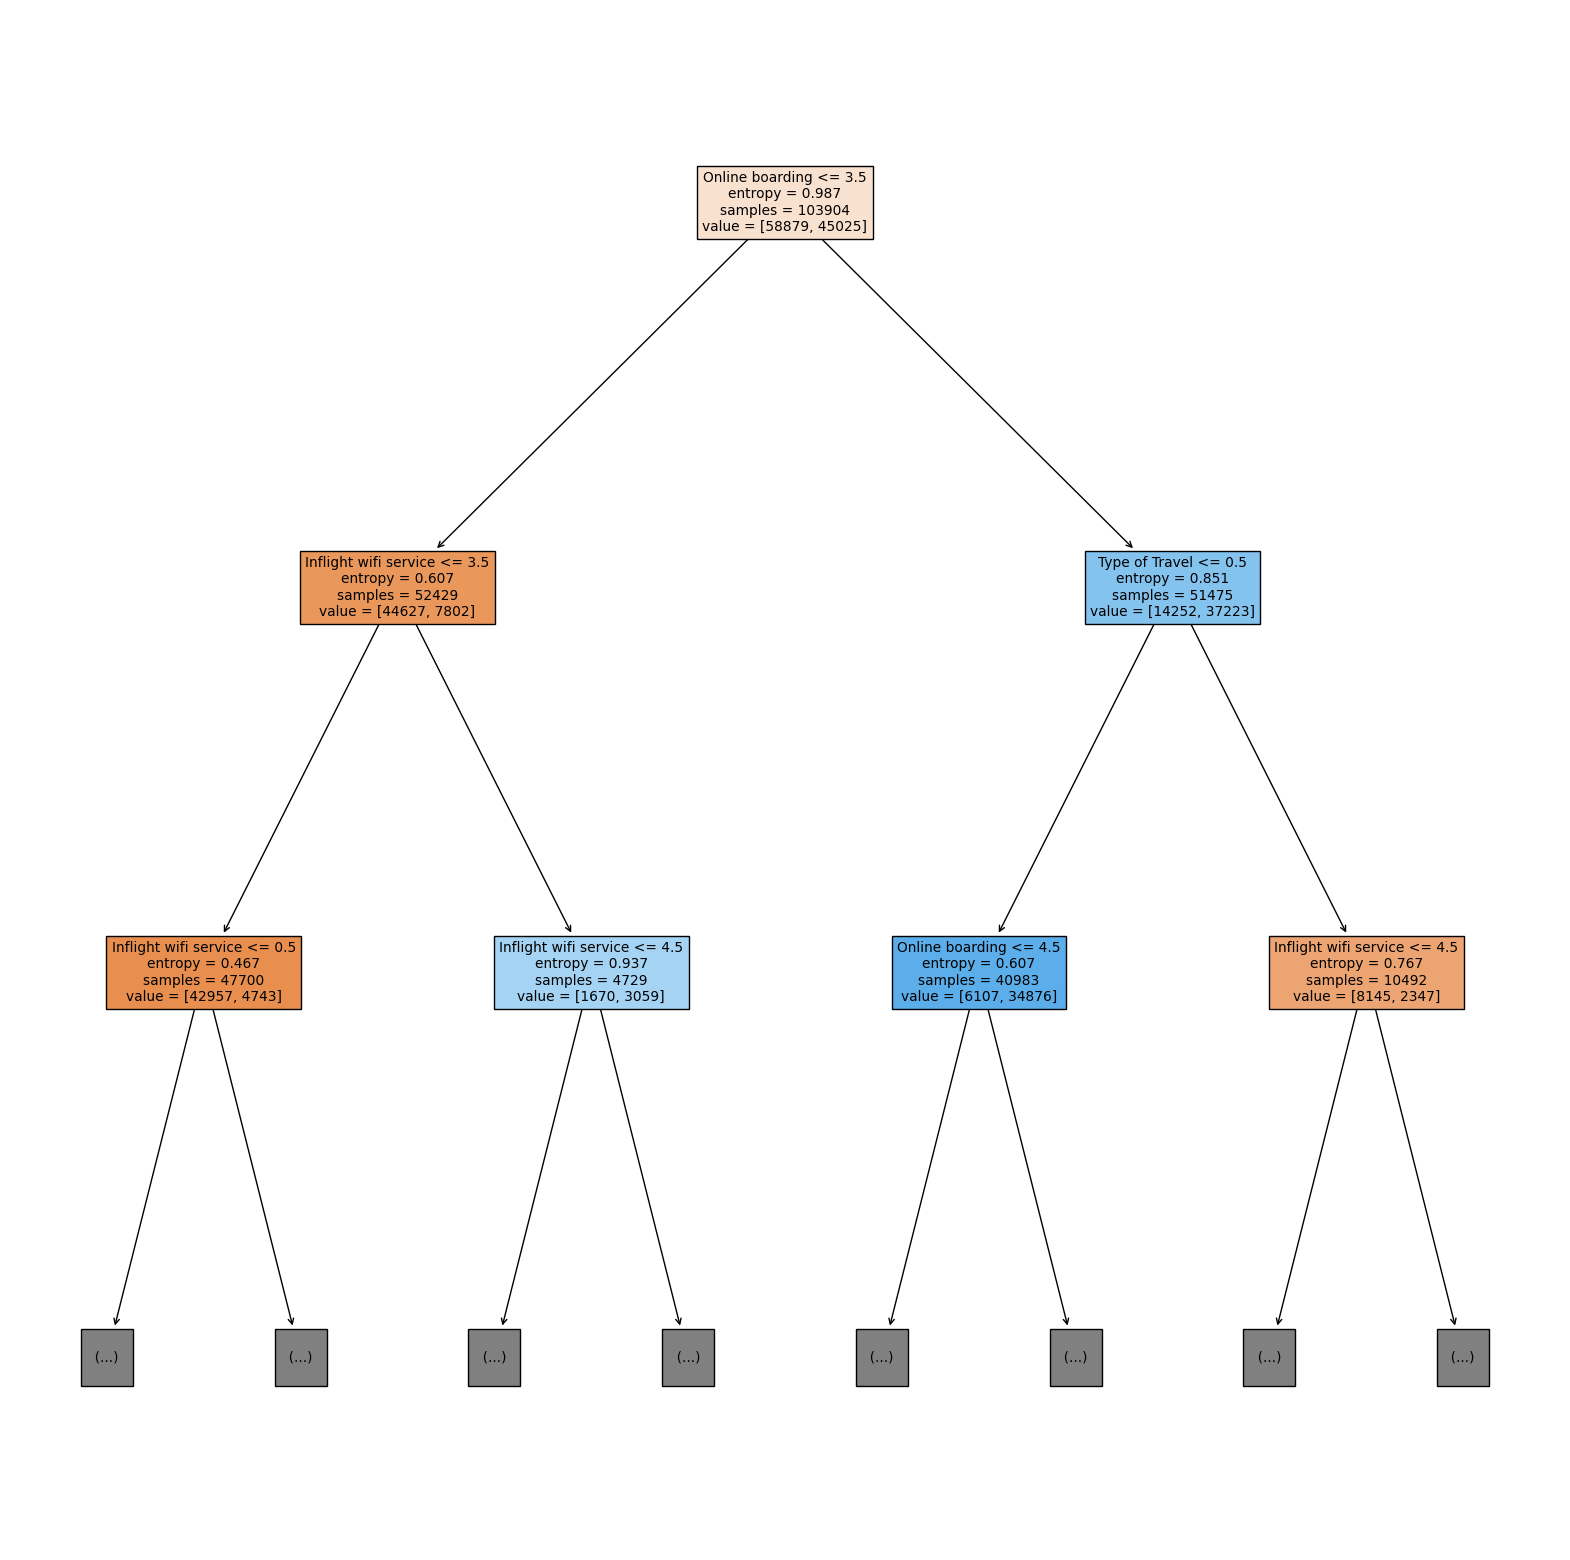

In [19]:
from sklearn import tree

X_train = trainData.drop(columns=['satisfaction'])
Y_train = trainData['satisfaction']
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)
clf.fit(X_train, Y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, max_depth = 2)
plt.show()

# Feature Selection

In [20]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

mutualRegression = mutual_info_regression(trainDataX, trainDataY)

mutualRegDict = {}
for i, val in enumerate(mutualRegression):
    mutualRegDict[trainData.columns[i]] = round(val, 6)


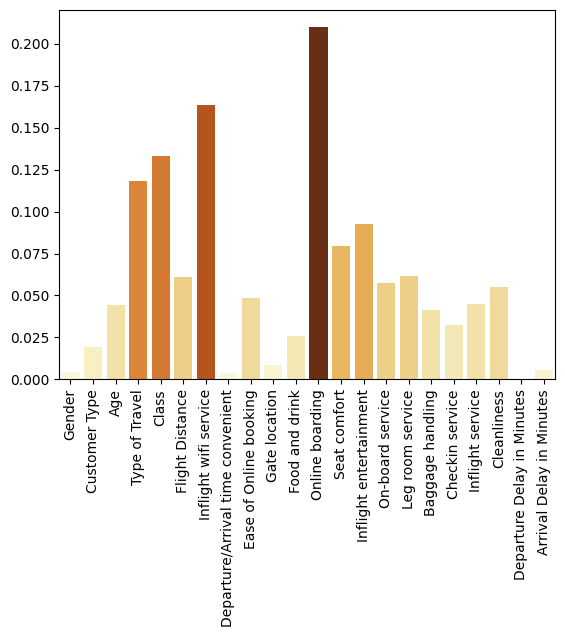

In [21]:
def colors_from_values(values, palette_name):
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

keys, values = list(mutualRegDict.keys()), list(mutualRegDict.values())
sns.barplot(x=keys, y=values, palette=colors_from_values(values, 'YlOrBr'))
plt.xticks(rotation=90)
plt.show()

In [22]:
threshold = sum(values)/len(mutualRegDict)
features = [i for i, (j, k) in enumerate(mutualRegDict.items()) if k > threshold]

Estimates mutual information for a continuous target variable.

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

> Above, we calculated a trheshold that takes the sum of all values in the mutual regression dictionary previously created and dividing that number by the number of features, essentially. With that, we made a list of relevant features that goes through the dictionary and keeps the features with values that are larger than the threshold we obtained.

In [24]:
selector = SelectKBest(mutual_info_regression, k=len(features))
trainNew = selector.fit_transform(trainDataX, trainDataY)
_filter = selector.get_support(indices=True)
features = np.array(trainData.columns[_filter].values)

print('Number of relevant features: ' + str(len(features)) + '\n')
print('Features: ')
print(features)

Number of relevant features: 8

Features: 
['Type of Travel' 'Class' 'Inflight wifi service' 'Online boarding'
 'Seat comfort' 'Inflight entertainment' 'On-board service'
 'Leg room service']


# Final data

In [25]:
X_train = trainDataX.loc[:,features].reset_index(drop=True)
y_train = trainDataY
X_test = testDataX.loc[:,features].reset_index(drop=True)
y_test = testDataY

In [26]:
print(X_test.columns == X_train.columns)

[ True  True  True  True  True  True  True  True]


# Model Tuning

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [28]:
models = ['knn', 'dt', 'nb', 'lr']

modelGrids = {
    'knn': {
        'n_neighbors': range(5,10,2)
    },
    'dt': {
        'criterion': ['gini'],
        'max_depth': range(9,14),
        'min_samples_split': range(2,6,1),
        'min_samples_leaf': range(1,3)
    },
    'nb': {
        'var_smoothing': np.logspace(0,-9,num=50)
    },
    'lr': {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    }
}

modelMetrics = {
    'knn': {},
    'dt': {},
    'nb': {},  
    'lr': {}
}

for i, clf in enumerate(models):
    if clf == 'knn':
        print('KNearestNeighbors GridSearch...')
        model = KNeighborsClassifier()
    elif clf == 'dt':
        print('DecisionTree GridSearch...')
        model = DecisionTreeClassifier()
    elif clf == 'nb':
        print("GuassianNB GridSearch...")
        model = GaussianNB()
    elif clf == 'lr':
        print("LogisticsReg GridSearch...")
        model = LogisticRegression(max_iter=1000)

    paramGrid = modelGrids[clf]
    grid = GridSearchCV(model, paramGrid, cv=5, scoring='f1', error_score='raise', return_train_score=True, verbose=1)
    gridResult = grid.fit(X_train, y_train)
    modelMetrics[clf]['bestParams'] = gridResult.best_params_
    modelMetrics[clf]['meanTrainScore'] = gridResult.cv_results_["mean_train_score"]*100
    modelMetrics[clf]['meanTestScore'] = gridResult.cv_results_["mean_test_score"]*100
    modelMetrics[clf]['bestModel'] = gridResult.best_estimator_
    print('\n')

KNearestNeighbors GridSearch...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


DecisionTree GridSearch...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


GuassianNB GridSearch...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


LogisticsReg GridSearch...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")




knn


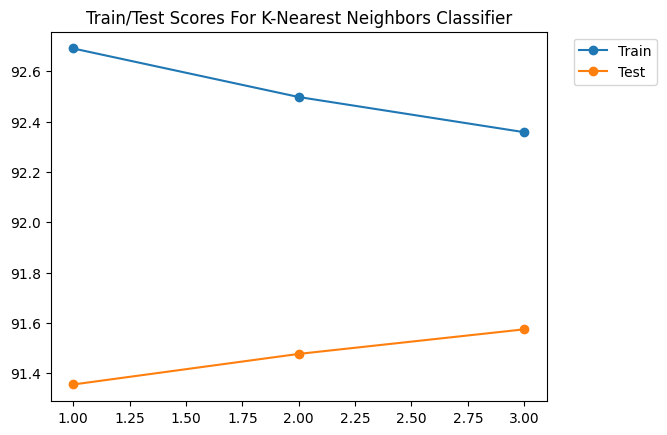



dt


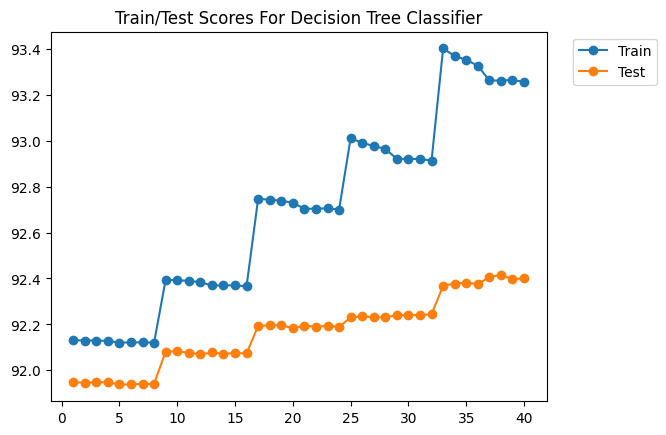



nb


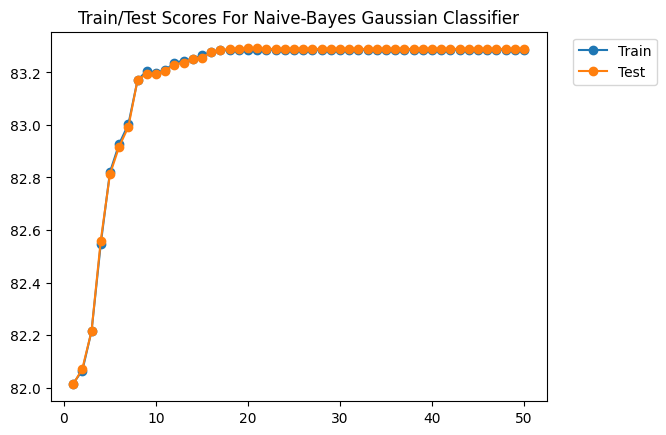



lr


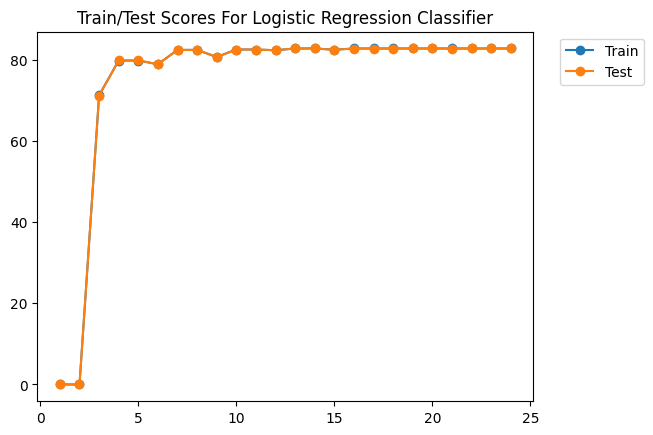

In [29]:
for i in modelMetrics:
    if i == 'knn':
        name = 'K-Nearest Neighbors'
    elif i == 'dt':
        name = 'Decision Tree'
    elif i == 'nb':
        name = 'Naive-Bayes Gaussian'
    elif i == 'lr':
        name = 'Logistic Regression'

    print(i)
    x = [x for x in range(1, modelMetrics[i]['meanTrainScore'].shape[0] + 1)]
    plt.plot(x, modelMetrics[i]['meanTrainScore'], '-o', label='Train')
    plt.plot(x, modelMetrics[i]['meanTestScore'], '-o', label='Test')
    plt.title('Train/Test Scores For ' + name + ' Classifier')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    print('\n')

## Compare Train Score w/ Test Score

In [30]:
for i in models:
    if i == 'knn':
        print('KNearestNeighbor Train/Test Scores')
    elif i == 'dt':
        print('DecisionTree Train/Test Scores')
    elif i == 'nb':
        print('GaussianNB Train/Test Scores')
    elif i == 'lr':
        print('LogisticsRegression Train/Test Scores')


    model = modelMetrics[i]['bestModel']

    # train
    y_pred = model.predict(X_train)
    trainAcc = accuracy_score(y_train, y_pred)

    # test
    y_pred = model.predict(X_test)
    testAcc = accuracy_score(y_test, y_pred)

    #print('Scoring criteria: ' + str(modelMetrics[i]['f1']))
    print('Train Score: ' + str(trainAcc*100))
    print('Test Score: ' + str(testAcc*100))
    print(modelMetrics[i]['bestParams'])
    print('\n')

KNearestNeighbor Train/Test Scores
Train Score: 93.53345395749923
Test Score: 92.97428395441946
{'n_neighbors': 9}


DecisionTree Train/Test Scores
Train Score: 94.13112103480135
Test Score: 93.6210348013551
{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 3}


GaussianNB Train/Test Scores
Train Score: 85.45580535879273
Test Score: 85.09393286110256
{'var_smoothing': 0.00032374575428176434}


LogisticsRegression Train/Test Scores
Train Score: 85.31432861102556
Test Score: 84.88989836772404
{'C': 0.1, 'solver': 'newton-cg'}




# Model Evaluation

In [31]:
from collections import defaultdict
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
    log_loss,
    roc_auc_score,
)

scores = defaultdict(list)
clf = None
for name in modelMetrics:
    if name == 'knn':
        continue
        print('KNearestNeighbors...')
    elif name == 'dt':
        print('DecisionTree...')
    elif name == 'nb':
        print("Guassian Naive Bayes...")
    elif name == 'lr':
        print("LogisticRegression...")    

    clf = modelMetrics[name]['bestModel']

    y_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores)
    score_df.round(decimals=3)

score_df

DecisionTree...
Guassian Naive Bayes...
LogisticRegression...


,Classifier,Brier loss,Log loss,Precision,Recall,F1,Roc auc
0,dt,0.048140,0.282416,0.942196,0.910550,0.926103,0.933419
1,nb,0.117887,0.499505,0.825651,0.837236,0.831403,0.849449
2,lr,0.113303,0.384122,0.838065,0.812856,0.825268,0.844979


In [32]:
DeepnoteChart(score_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Brier  loss","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Brier  loss"}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Brier  loss","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Brier  loss"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Log loss","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Log loss"}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Log loss","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Log loss"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#e45756","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Precision ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Precision "}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Precision ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Precision "}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#83bcb6","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Recall ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Recall "}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Recall ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Recall "}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#54a24b","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"F1 ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"F1 "}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"F1 ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"F1 "}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#f2cf5b","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Roc auc ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Roc auc "}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Roc auc ","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Roc auc "}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [33]:
DeepnoteChart(score_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Brier  loss","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Brier  loss"},"xOffset":{"datum":"Brier  loss"}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Log loss","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Log loss"},"xOffset":{"datum":"Log loss"}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#e45756","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Precision ","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Precision "},"xOffset":{"datum":"Precision "}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#83bcb6","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Recall ","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Recall "},"xOffset":{"datum":"Recall "}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#54a24b","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"F1 ","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"F1 "},"xOffset":{"datum":"F1 "}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#f2cf5b","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Classifier","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Roc auc ","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Roc auc "},"xOffset":{"datum":"Roc auc "}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

## Confusion Matrix

In [34]:
y_test.value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

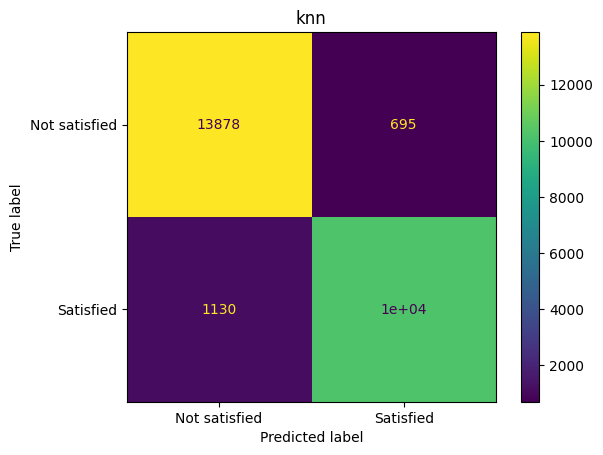

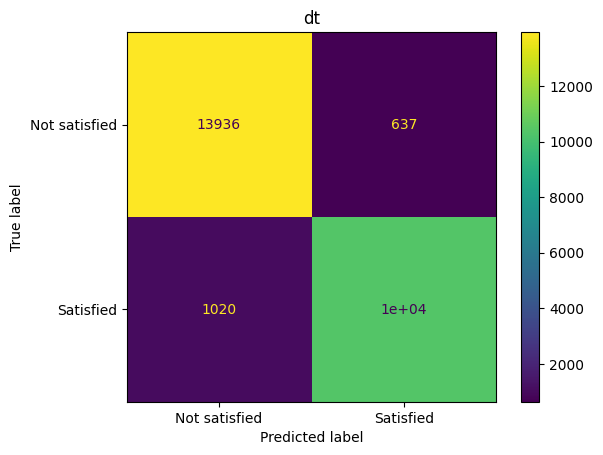

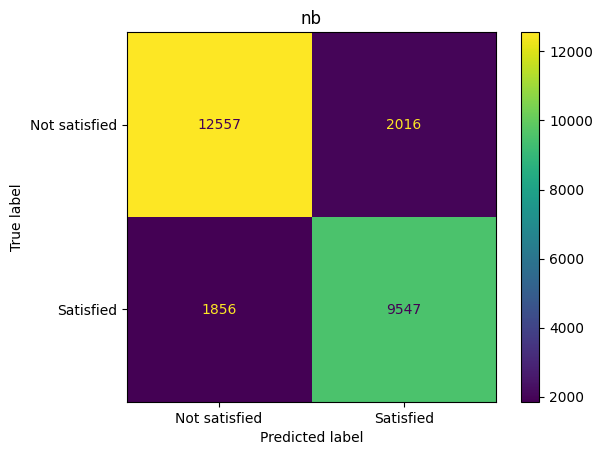

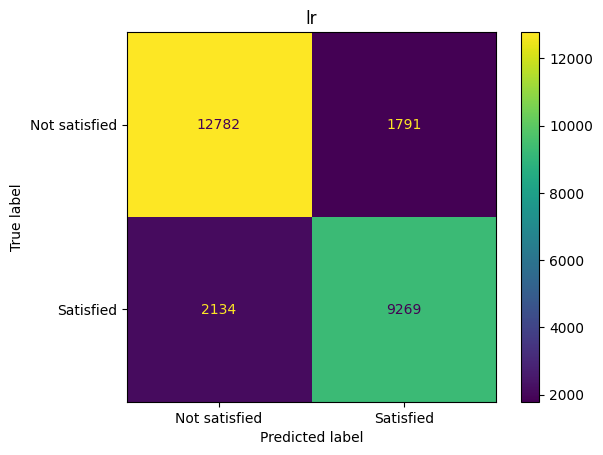

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for name in modelMetrics:
    clf = modelMetrics[name]['bestModel']
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not satisfied", "Satisfied"])
    disp.plot()
    plt.title(name)
plt.show()

## ROC - Area under Curve

In [36]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score


result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


for name in modelMetrics:
    #plt.title(name)
    clf = modelMetrics[name]['bestModel']
    y_pred = clf.predict(X_test)
    #RocCurveDisplay.from_predictions(y_test, y_pred)
    yproba = clf.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    new_row = pd.DataFrame.from_records([{'classifiers':name, 'fpr':fpr, 'tpr':tpr, 'auc':auc}])
    result_table = pd.concat([result_table, new_row])
    
    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


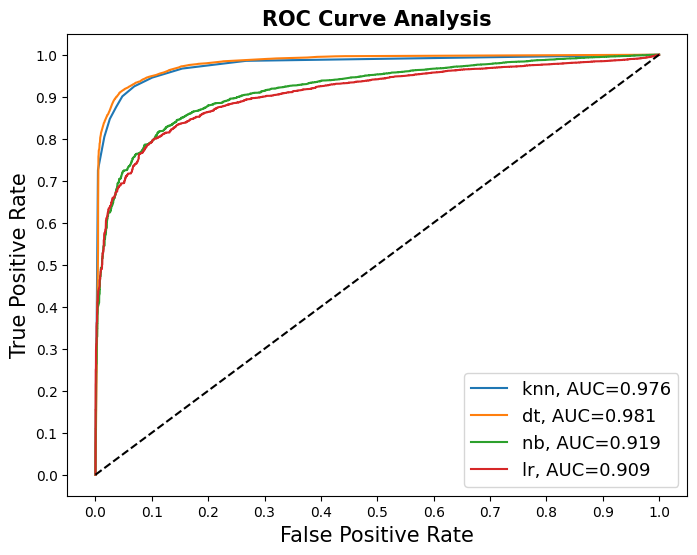

In [37]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## f1 score

$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $$

$$ Precision = \frac{TP}{TP+FP} $$

$$ Recall = \frac{TP}{TP+FN} $$

$$ f_1 score = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN} $$

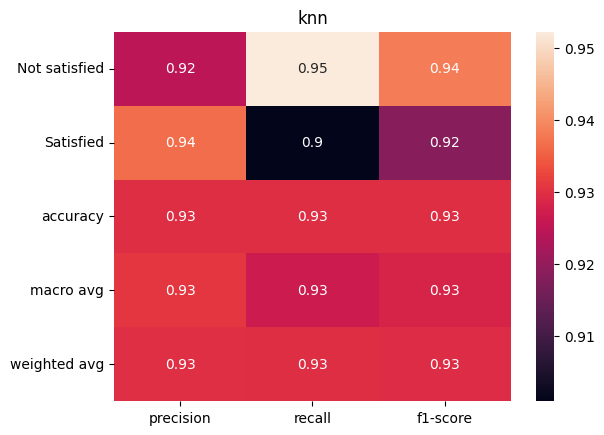

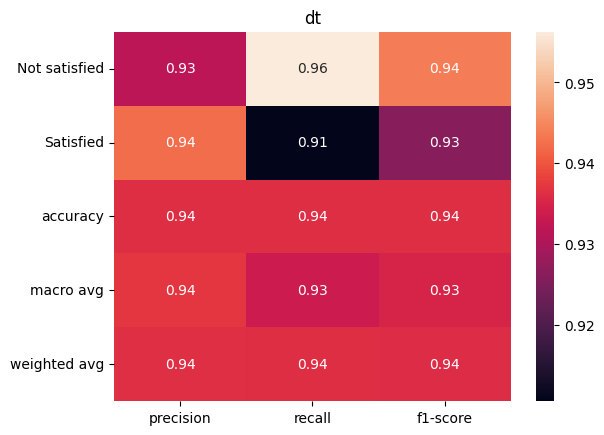

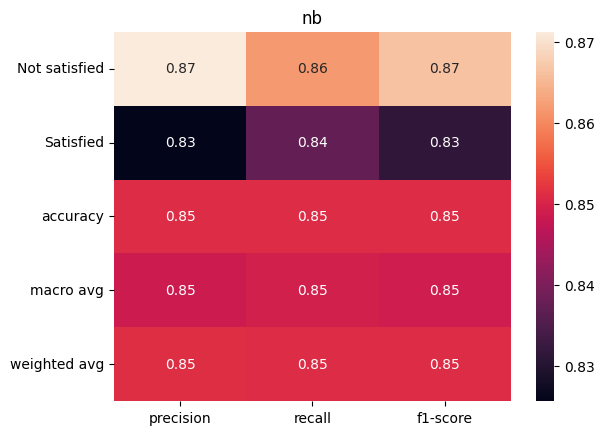

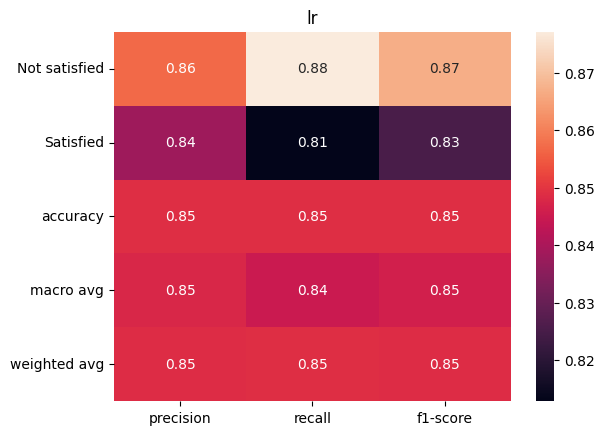

In [38]:
from sklearn.metrics import classification_report

for name in modelMetrics:
    clf = modelMetrics[name]['bestModel']
    y_pred = clf.predict(X_test)
    clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=clf.classes_,
                                   target_names=["Not satisfied", "Satisfied"],
                                   output_dict=True)

    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.title(name)
    plt.show()

# Model Visualizations

<AxesSubplot: xlabel='satisfaction', ylabel='count'>

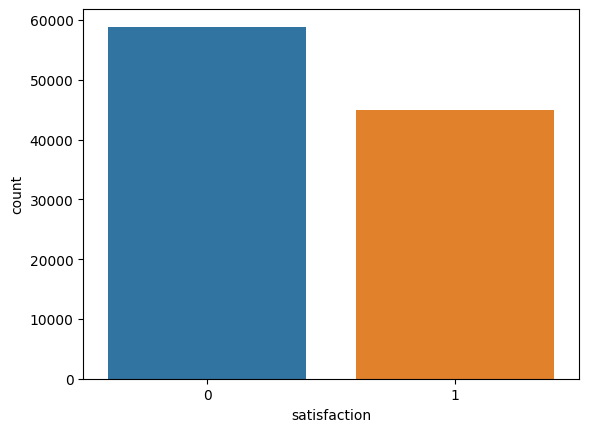

In [39]:
sns.countplot(x=trainData['satisfaction'])

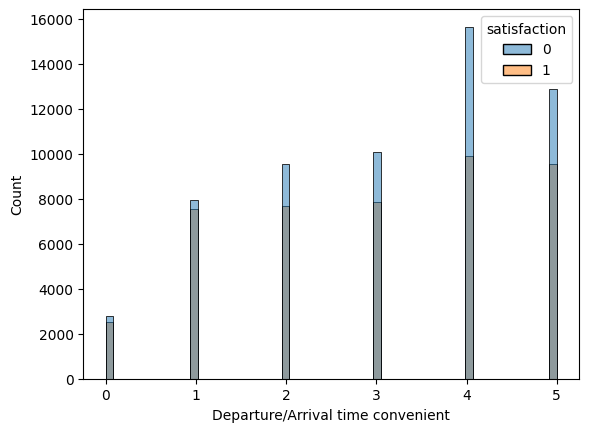

In [40]:
sns.histplot(data=trainData, x="Departure/Arrival time convenient", hue="satisfaction")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=165f94fd-0b8c-4538-a0fa-c0f4c355308f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>